In [6]:
!make install # Run command to install necessary modules

pip install -r requirements.txt


In [7]:
import json
with open('scrapy/output.json', 'r') as file:
    # Loads the JSON data from the file created from 'scrapy'
    companies_data = json.load(file)

companies_data

[{'Filing Type': 'Corporation - Business - Foreign',
  'Status': 'Active',
  'Standing - AR': 'Good',
  'Standing - RA': 'Good',
  'Standing - Other': 'Good',
  'Formed In': 'NORTH CAROLINA',
  'Term of Duration': 'Perpetual',
  'Initial Filing Date': '05/30/2018',
  'Principal Address': '4043 PIEDMONT PARKWAY\nHIGH POINT, NC 27265-9402',
  'Mailing Address': '615 S COLLEGE ST\nFL 9\nTAX DEPT\nCHARLOTTE, NC 28202-3355',
  'AR Due Date': '05/15/2025',
  'Commercial Registered Agent': 'REGISTERED AGENT SOLUTIONS, INC.\n1709 N 19TH ST STE 3\nBISMARCK, ND  58501-2121',
  'COMPANY': 'GXO LOGISTICS SUPPLY CHAIN, INC.'},
 {'Filing Type': 'Limited Liability Company - Business - Foreign',
  'Status': 'Active',
  'Standing - AR': 'Good',
  'Standing - RA': 'Good',
  'Standing - Other': 'Good',
  'Formed In': 'DELAWARE',
  'Term of Duration': 'Perpetual',
  'Initial Filing Date': '11/26/2019',
  'Principal Address': 'ONE WORLD TRADE CENTER\n41ST FLOOR\nNEW YORK, NY 10007',
  'Mailing Address': '1

In [8]:
import networkx as nx
G = nx.Graph() # Person or Company that is an agent / owner

def create_graph():
    """
    Creates the graph, with two different types of nodes: company and person

    The edges are defined through defining relation between owner/agent and company
    """
    for data in companies_data:
        company_name = data["COMPANY"]
        G.add_node(company_name, type="Company")
        if "Commercial Registered Agent" in data:
            cr_agent = data["Commercial Registered Agent"].split("\n")[0]
            G.add_node(cr_agent, type="Person")
            G.add_edges_from([(company_name, cr_agent),])
        if "Registered Agent" in data:
            r_agent = data["Registered Agent"].split("\n")[0]
            G.add_node(r_agent, type="Person")
            G.add_edges_from([(company_name, r_agent),])
        if "Owner Name" in data:
            owner = data["Owner Name"]
            G.add_node(owner, type="Person")
            G.add_edges_from([(company_name, owner),])
        elif "Owners" in data:
            owner_1 = data["Owners"].split("\n")[0]
            owner_2 = data[""].split("\n")[0]
            G.add_node(owner_1, type="Person")
            G.add_node(owner_2, type="Person")
            edges = [(owner_1, company_name), (owner_2, company_name),]
            G.add_edges_from(edges)

create_graph()

In [9]:
# Set this to False if labels on graph are too distracting
graph_show_labels = True

/Users/icefreeze/miniconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


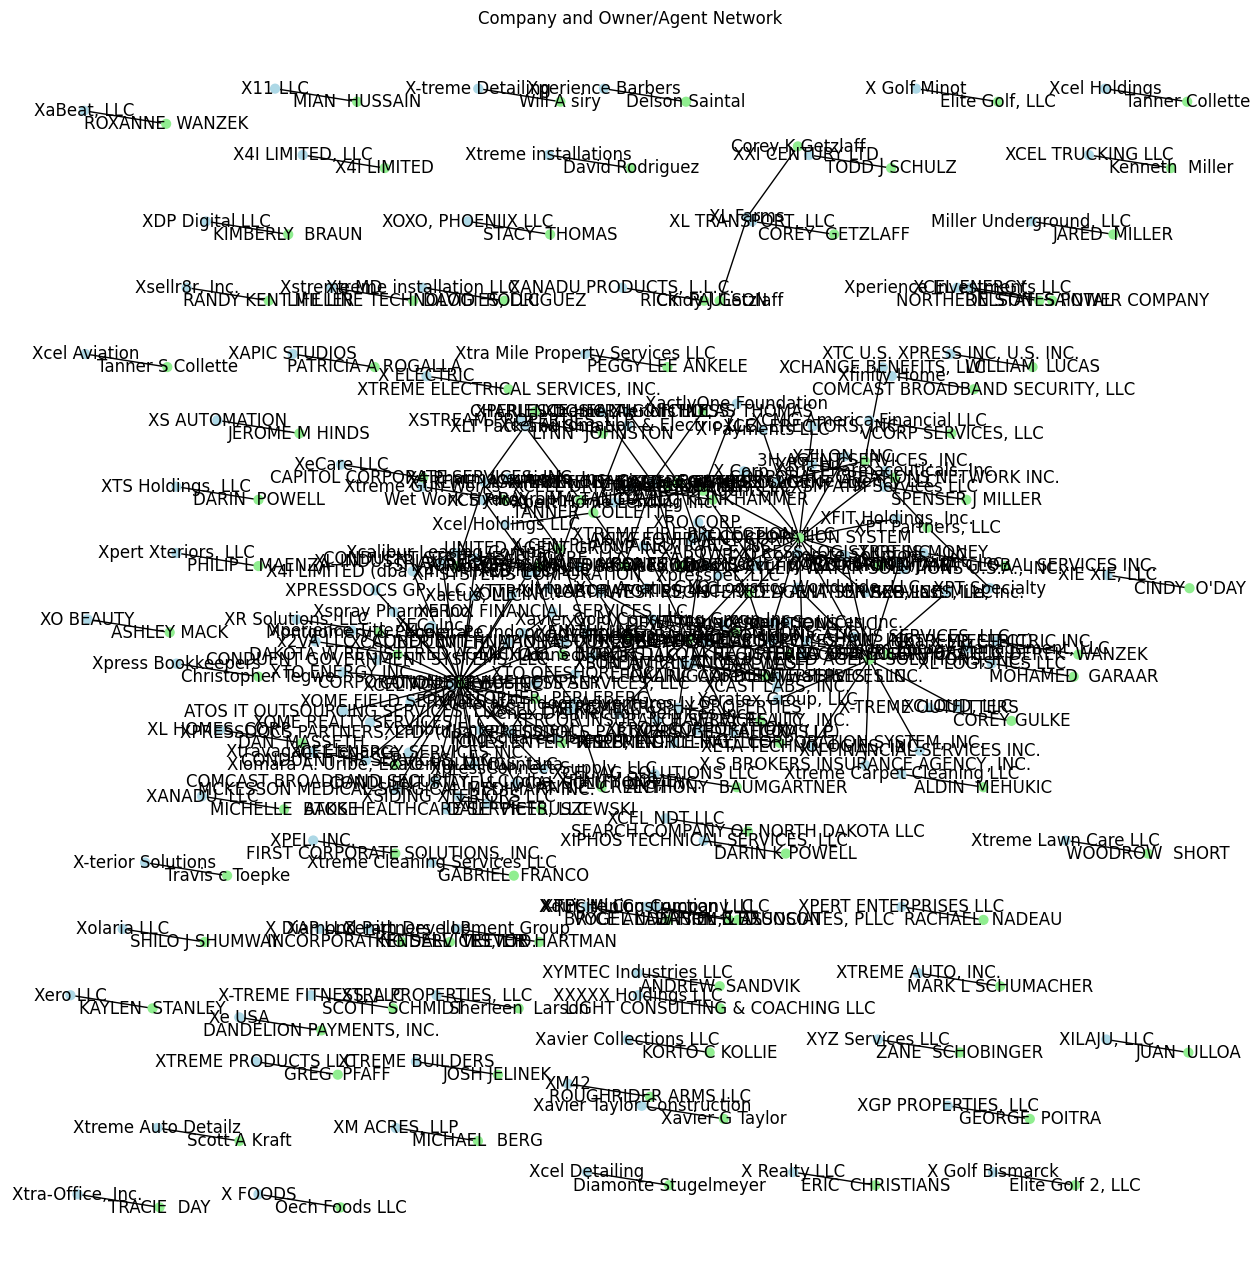

In [23]:
import matplotlib.pyplot as plt

def visualize_graph(type_colors):
    GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher
    plt.figure(1, figsize=(16, 16))
    plt.title('Company and Owner/Agent Network')
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
    components = (G.subgraph(component) for component in nx.connected_components(G))
    for sub_graph in components:
        subgraph_colors = [type_colors[G.nodes[node]['type']] for node in sub_graph.nodes()]
        nx.draw(sub_graph, pos, node_size=40, node_color=subgraph_colors, vmin=0.0, vmax=1.0, with_labels=graph_show_labels)

colors = {'Company': 'lightblue', 'Person': 'lightgreen'}

visualize_graph(colors)

In [24]:
def print_connected_component_data():
    for component in nx.connected_components(G):
        print(G.subgraph(component).nodes(data=True))

print_connected_component_data()

[('RXO Last Mile, Inc.', {'type': 'Company'}), ('Xeratex Group, LLC', {'type': 'Company'}), ('XCLOUD, LLC', {'type': 'Company'}), ('XPO Logistics Freight, Inc.', {'type': 'Company'}), ('RXO Corporate Solutions, LLC', {'type': 'Company'}), ('REGISTERED AGENT SOLUTIONS, INC.', {'type': 'Person'}), ('GXO LOGISTICS SUPPLY CHAIN, INC.', {'type': 'Company'}), ('GXO Logistics Worldwide, LLC', {'type': 'Company'}), ('Xencom Energy Management, LLC', {'type': 'Company'}), ('XN FINANCIAL SERVICES INC.', {'type': 'Company'}), ('X S BROKERS INSURANCE AGENCY, INC.', {'type': 'Company'}), ('XETA TECHNOLOGIES, INC.', {'type': 'Company'})]
[('Cirrata Partners Insurance Agency LLC', {'type': 'Company'}), ('XPT Specialty', {'type': 'Company'}), ('3H AGENT SERVICES, INC.', {'type': 'Person'}), ('XPT Partners, LLC', {'type': 'Person'}), ('XCHANGE BENEFITS, LLC', {'type': 'Company'})]
[('XOME FIELD SERVICES LLC', {'type': 'Company'}), ('XpressConnect Supply, LLC', {'type': 'Company'}), ('Xspray Pharma Inc.'